In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install optuna

In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [53]:
sample_path = 'sample_submission_V2.csv' 
train_path = 'train_V2.csv'
test_path = 'test_V2.csv'
sample = pd.read_csv(sample_path)
train= pd.read_csv(train_path)
test=pd.read_csv(test_path)

In [4]:
df_o= pd.read_csv(train_path)
df_o= df_o.dropna()


In [5]:
df=df_o.copy()

In [36]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.0000,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.000000,0,0.000000,0,0,161.7500,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.000000,0,0.000000,0,0,202.7500,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,solo-fpp,97,95,1560,0,0.000000,0,0.000000,0,0,49.7500,2,0,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00000,0,0,0,74,1029,0,0,0.00000,1873,squad-fpp,29,28,-1,0,1292.000000,0,0.000000,0,0,1019.0000,3,1507,0.178589
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15625,0,0,0,69,0,0,0,0.00000,1435,solo,93,93,1501,0,0.000000,0,0.000000,0,0,81.6875,6,0,0.293457
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06250,0,0,0,66,0,0,0,0.00000,1321,squad-fpp,28,28,1500,0,0.000000,0,2.183594,0,0,788.5000,4,0,0.481445
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.37500,1,1,2,11,0,2,1,98.50000,1373,squad-fpp,26,25,1418,2,0.000000,0,0.000000,0,0,2748.0000,8,0,0.799805


In [80]:
kill_p=df[['Id','matchId','groupId','kills','killPlace','winPlacePerc']].sort_values(by=['kills','killPlace'])
kill_p[kill_p['matchId']=='62a16aabcc095c'].head(50)

,Id,matchId,groupId,kills,killPlace,winPlacePerc
813359,c77935d0ddeb9b,62a16aabcc095c,298b6d4775ae44,0,46,0.969238
4279101,ccf46a11496acf,62a16aabcc095c,b2ccaf151a2845,0,47,0.948730
3595613,81884621179bee,62a16aabcc095c,d30bdf74564af7,0,48,0.917480
280785,fa3de992e2b362,62a16aabcc095c,cf67eec102b1b9,0,49,0.907227
657878,7b6db2a7482a09,62a16aabcc095c,b4839eedd98519,0,50,0.804199
2947991,ad8fec10255ef1,62a16aabcc095c,87698457eaf6f4,0,51,0.773438
4218403,cc87e977faf9bb,62a16aabcc095c,90135c3b8aaa16,0,52,0.762695
2816316,50415a25942193,62a16aabcc095c,a8e4bf40f9143f,0,53,0.721680
3085399,3fc88a64a60400,62a16aabcc095c,0b7ccc18ba22f7,0,54,0.690918
2237662,ab4a01c7375210,62a16aabcc095c,bcd0d22b570130,0,55,0.680176


In [78]:
train[train['matchId']=='01aead02bb8901']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.00,0,0,0,1,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,3,0,1.0
52509,0a2d95936da4ae,c70fd467685d53,01aead02bb8901,0,0,178.50,0,0,0,16,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,3,0,0.0
152897,d205ebdd9c0034,5cef1df7ee3551,01aead02bb8901,0,0,0.00,0,0,0,4,0,0,0,0.0,1808,solo,20,2,1500,0,7302.0,0,4.851,0,0,592.9,5,0,1.0
231175,40b3cf3ded58ef,c70fd467685d53,01aead02bb8901,0,0,0.00,0,0,0,11,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,3,0,0.0
313663,1e726bf8c7afbf,5cef1df7ee3551,01aead02bb8901,0,0,119.40,0,0,0,3,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,8,0,1.0
450942,3e5d4dea709622,c70fd467685d53,01aead02bb8901,0,0,78.00,0,0,0,10,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,3,0,0.0
764357,39c64d1652702e,c70fd467685d53,01aead02bb8901,0,0,0.00,0,0,0,20,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,0,0,0.0
1322292,c5ae332274f01c,c70fd467685d53,01aead02bb8901,0,0,0.00,0,0,0,18,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,7,0,0.0
1692053,618a59dc602a34,c70fd467685d53,01aead02bb8901,0,0,159.00,0,0,0,9,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,5,0,0.0
1843671,00d5eab45b85f3,5cef1df7ee3551,01aead02bb8901,0,0,0.00,0,0,0,2,0,0,0,0.0,1808,solo,20,2,1500,0,0.0,0,0.000,0,0,0.0,3,0,1.0


In [107]:
a=df[df['matchId']=='01aead02bb8901'].sort_values(by='winPlacePerc')
a[['Id','matchId','groupId','winPlacePerc']]

,Id,matchId,groupId,winPlacePerc
3623197,3abfe89c167d36,01aead02bb8901,c70fd467685d53,0.0
52509,0a2d95936da4ae,01aead02bb8901,c70fd467685d53,0.0
3336416,b5f1deb62dccee,01aead02bb8901,c70fd467685d53,0.0
231175,40b3cf3ded58ef,01aead02bb8901,c70fd467685d53,0.0
3180808,4eaae52d4008df,01aead02bb8901,c70fd467685d53,0.0
450942,3e5d4dea709622,01aead02bb8901,c70fd467685d53,0.0
764357,39c64d1652702e,01aead02bb8901,c70fd467685d53,0.0
1322292,c5ae332274f01c,01aead02bb8901,c70fd467685d53,0.0
1692053,618a59dc602a34,01aead02bb8901,c70fd467685d53,0.0
3406804,b8f774ec845b92,01aead02bb8901,c70fd467685d53,0.0


In [55]:
train[train['matchId']=='3e029737889ce9']['winPlacePerc'].nunique()

14

In [57]:
df.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

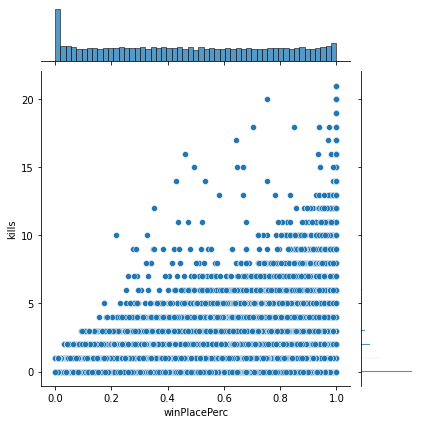

In [76]:
c=df[df['matchType']=='solo'].sort_values(by='kills')
sns.jointplot(data=c,x='winPlacePerc',y='kills')

In [97]:
d=df[df['matchType']=='squad'].sort_values(by='kills')
d

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.59375,0,0,0,64,0,0,0,0.0000,1375,squad,28,27,1493,0,0.0,0,0.000000,0,0,800.00000,4,0,0.370361
2571599,fe45055657f368,9401bfb4830305,5f3efcf267ad1b,0,0,16.96875,0,0,1,64,0,0,0,0.0000,1968,squad,29,28,1376,0,3748.0,0,0.000000,0,0,1584.00000,4,0,0.392822
2571591,a51138c114afbb,6c2b7c35c15c99,72fd23a75526c1,1,0,104.00000,0,0,0,62,0,0,0,0.0000,1375,squad,27,26,1465,0,0.0,0,0.000000,0,0,573.50000,3,0,0.269287
2571575,91d54daff10045,843cebd8974928,b67c6c94d9c4b1,0,0,0.00000,0,0,0,96,1000,0,0,0.0000,1470,squad,28,25,-1,0,0.0,0,0.000000,0,0,34.53125,2,1500,0.000000
2571558,7860919d2530b7,fb978006870b09,df79cfe92919fd,0,0,0.00000,0,0,0,94,0,0,0,0.0000,1885,squad,28,27,1414,0,0.0,0,0.000000,0,0,0.00000,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493308,aac8b35c0de13c,85aade18d6d52a,4f8be30d0cadeb,0,1,3036.00000,25,7,0,1,1345,22,6,732.0000,1896,squad,26,26,-1,1,922.0,0,0.000000,0,0,3020.00000,4,1534,0.879883
3340751,73b784070b5f29,ea135a63117f52,345e8fe6cc8ecb,1,2,2128.00000,12,13,0,1,0,23,4,121.1875,1457,squad,32,31,1649,0,0.0,0,0.000000,0,0,2616.00000,4,0,0.903320
4390901,310cdfbe701f03,02b0ccfda16b93,f755207f23cf88,2,4,2644.00000,16,8,0,1,0,24,5,436.7500,1319,squad,27,27,1526,0,0.0,0,0.000000,0,0,3180.00000,7,0,1.000000
2381416,58ada568ab859e,0ada1c1ea485c2,0479fa5e797469,0,4,2224.00000,15,16,6,1,0,25,3,777.5000,1837,squad,28,27,1525,1,4280.0,0,0.000000,0,0,4032.00000,10,0,1.000000


In [98]:
df[df['matchId']=='72fd23a75526c1']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
94508,9f34a140c080f6,808932abc947e7,72fd23a75526c1,1,1,426.500000,3,1,3,5,0,4,2,19.218750,1375,squad,27,26,1482,0,0.000000,0,0.0000,0,0,2236.000000,6,0,0.730957
204002,4ab5b26c49f885,1dfdce5c647609,72fd23a75526c1,0,1,397.750000,4,0,2,8,0,3,1,11.437500,1375,squad,27,26,1763,1,101.687500,0,0.0000,0,0,734.500000,3,0,0.538574
208472,4f3f66770c8442,f054abef71aa21,72fd23a75526c1,0,3,277.250000,2,1,4,12,0,2,2,74.500000,1375,squad,27,26,1624,0,0.000000,0,0.0000,0,0,2366.000000,4,0,0.807617
314714,b2feb254a24c06,538da7c0f90980,72fd23a75526c1,0,0,151.500000,1,0,0,40,0,1,1,1.718750,1375,squad,27,26,1478,0,0.000000,0,0.0000,0,0,143.000000,2,0,0.038513
373192,9b4aa3a3af7d03,44d5602c17d02b,72fd23a75526c1,0,1,142.250000,1,0,2,35,0,1,1,16.718750,1375,squad,27,26,1526,0,0.000000,0,0.0000,0,0,272.500000,2,0,0.153809
381107,823c1b52b5547f,8e9a21d795864e,72fd23a75526c1,0,1,83.812500,0,0,0,50,0,0,0,0.000000,1375,squad,27,26,1456,0,0.000000,0,0.0000,0,0,2344.000000,3,0,0.615234
389288,5941028e4a3970,1aa1704ac87cbc,72fd23a75526c1,0,0,29.406250,0,0,0,74,0,0,0,0.000000,1375,squad,27,26,1474,0,0.000000,0,0.0000,0,0,274.500000,2,0,0.115417
407417,2cf8b1c080b207,4658528887db8c,72fd23a75526c1,0,0,100.000000,1,0,0,30,0,1,1,35.812500,1375,squad,27,26,1529,0,0.000000,0,0.0000,0,0,389.000000,3,0,0.384521
433651,3a25df9d493a69,6c2b7c35c15c99,72fd23a75526c1,1,0,56.343750,0,0,0,60,0,0,0,0.000000,1375,squad,27,26,1423,0,0.000000,0,0.0000,0,0,360.750000,4,0,0.269287
448387,3e1daaca228278,417d9683e0dbe8,72fd23a75526c1,0,1,22.968750,0,0,0,43,0,0,0,0.000000,1375,squad,27,26,1317,0,0.000000,0,0.0000,0,0,2532.000000,6,0,0.884766


In [99]:
x=df[df['groupId']=='a4606849d1bf59']
x[['groupId','winPlacePerc','walkDistance','damageDealt','kills','boosts']]

,groupId,winPlacePerc,walkDistance,damageDealt,kills,boosts
1631272,a4606849d1bf59,0.769043,2848.0,208.75,2,2
4250256,a4606849d1bf59,0.769043,32.5,0.00,0,0
4429949,a4606849d1bf59,0.769043,2352.0,219.25,1,2


In [93]:
df[df['matchId']=='a10357fd1a4a91']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.531250,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000000,0,0,49.750000,2,0,0.187500
37038,cf806bed1e2faa,00523e90e8568c,6dc8ff871e21e6,0,0,127.312500,0,0,0,44,0,1,1,5.574219,1424,solo-fpp,97,95,1470,0,0.0000,0,0.000000,0,0,76.312500,2,0,0.197876
72969,008f1608733228,c3bdbde15faed3,6dc8ff871e21e6,0,0,0.000000,0,0,0,94,0,0,0,0.000000,1424,solo-fpp,97,95,1497,0,0.0000,0,0.000000,0,0,0.000000,0,0,0.031204
76620,213eb3ec42070d,8f7560b8e2a612,6dc8ff871e21e6,0,0,154.250000,0,0,0,23,0,1,1,26.953125,1424,solo-fpp,97,95,1634,0,1299.0000,0,0.000000,0,0,1543.000000,5,0,0.781250
104655,7f566bad9c7e1f,c37f5165d082f9,6dc8ff871e21e6,1,0,82.562500,0,0,0,73,0,0,0,0.000000,1424,solo-fpp,97,95,1603,0,0.0000,0,0.000000,0,0,212.500000,1,0,0.333252
187998,8dca2afadaf0d2,02441b05ed15e7,6dc8ff871e21e6,0,7,368.000000,0,2,2,5,0,4,1,228.250000,1424,solo-fpp,97,95,1629,0,1983.0000,0,0.000000,0,0,2448.000000,5,0,0.906250
240302,50cb6679571ead,af7775f3c363ec,6dc8ff871e21e6,0,1,37.531250,0,0,4,63,0,0,0,0.000000,1424,solo-fpp,97,95,1747,0,0.0000,0,0.000000,0,0,401.500000,2,0,0.541504
273891,fcf98ee4b6b0e5,8c961562aa998d,6dc8ff871e21e6,0,3,147.125000,0,0,9,21,0,1,1,44.968750,1424,solo-fpp,97,95,1652,0,3344.0000,0,15.820312,0,0,1967.000000,3,0,0.864746
293705,e52b9b7178a55d,d1191ffcab9780,6dc8ff871e21e6,0,0,0.000000,0,0,0,77,0,0,0,0.000000,1424,solo-fpp,97,95,1532,0,0.0000,0,0.000000,0,0,42.750000,2,0,0.229248
345096,dce5bd8d512952,2e1489a06950d4,6dc8ff871e21e6,0,0,66.000000,0,0,0,92,0,0,0,0.000000,1424,solo-fpp,97,95,1490,0,0.0000,0,0.000000,0,0,4.464844,1,0,0.052094


In [62]:
df[df['groupId']=='3fe42857a5d0e3']-> solo였으면 등수가 안좋지만 -> squed일때 등수가 높을수도 있다.

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
197163,76f1c4b5da99b6,3fe42857a5d0e3,a10357fd1a4a91,2,5,209.75,1,0,2,40,1173,0,0,0.0000,1306,squad-fpp,28,26,-1,0,48.34375,0,0.0,0,0,4216.0,6,1549,1.0
1386393,f9868b1c4897fa,3fe42857a5d0e3,a10357fd1a4a91,2,1,310.75,2,3,3,7,1527,3,1,85.8750,1306,squad-fpp,28,26,-1,1,0.00000,0,0.0,0,0,4304.0,5,1589,1.0
2162806,3b4c851d88e6fe,3fe42857a5d0e3,a10357fd1a4a91,2,4,434.25,2,2,1,2,1737,5,2,108.8125,1306,squad-fpp,28,26,-1,1,0.00000,0,0.0,0,0,4460.0,5,1585,1.0
3692199,cde20a5d1c073d,3fe42857a5d0e3,a10357fd1a4a91,1,6,420.00,6,0,1,1,1739,7,2,84.5000,1306,squad-fpp,28,26,-1,0,0.00000,0,0.0,0,0,4184.0,4,1590,1.0


In [ ]:
kill_p=df[['Id','matchId','groupId','kills','killPlace','winPlacePerc']].sort_values(by=['kills','killPlace'])
kill_p[kill_p['matchId']=='6dc8ff871e21e6']

In [ ]:
#캐쥬얼 모드 분석-> 이상치 생각보다 적음
# 테스트 자료에 캐쥬얼모드가 포함되어 있으면 포함하는게 좋을듯
# 캐쥬얼모드를 제외한 모델을 전체 데이터에 예측 0.10801
# 캐쥬얼모드와 노말모드 제거 -> 0.0968
# 캐쥬얼모드와 노말모드 포함 ->0.0978
# 캐쥬얼 모드만 ->0.11
# casual = train[(train['matchType'] =='flaretpp')|
#    (train['matchType'] =='flarefpp')|
#    (train['matchType'] =='crashfpp')|
#    (train['matchType'] =='crashtpp')]
# casual

In [ ]:
train.head(100)

In [ ]:
# #캐쥬얼 모드 히트맵으로 상관성 분석
# plt.figure(figsize=(12,12))
# sns.heatmap(casual.corr(),annot=True)

In [ ]:
# # 캐쥬얼모드 각 컬럼별 winPlacePerc와의 상관성 시각화
# col_name=['assists', 'boosts', 'damageDealt', 'DBNOs',
#        'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
#        'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
#        'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
#        'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
#        'weaponsAcquired', 'winPoints']
# for i in col_name:
#     sns.jointplot(x='winPlacePerc',y=i,data=casual,height=5, ratio=3)


In [ ]:
#casual.describe()
#casual.corr()

In [6]:
#데이터 타입 최적화-> 메모리 최적화
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
df = reduce_mem_usage(df)
test = reduce_mem_usage(test)

In [ ]:
# 캐주얼, 노말 모드 drop
# df= df[~(df['matchType'] =='flaretpp')&
#    ~(df['matchType'] =='flarefpp')&
#    ~(df['matchType'] =='crashfpp')&
#    ~(df['matchType'] =='crashtpp')&
#    ~(df['matchType'] =='normal-squad-fpp')&
#    ~(df['matchType'] =='normal-solo-fpp')&
#    ~(df['matchType'] =='normal-duo-fpp')&
#    ~(df['matchType'] =='normal-duo')&
#    ~(df['matchType'] =='normal-squad')&
#    ~(df['matchType'] =='normal-solo')]

In [ ]:
# matchid 60명 이하인 데이터 drop
# matchId_drop = df['matchId'].value_counts().loc[df['matchId'].value_counts()>60].index
# df = df.loc[df['matchId'].isin(matchId_drop)]

In [ ]:
# df = df.drop(columns=['Id',
#                  'killPoints',
#                  'matchDuration',
#                  'maxPlace',
#                  'teamKills',
#                  'roadKills',
#                  'vehicleDestroys',
#                 ])

EDA

In [ ]:
#damageDealt는 데미지를 많이 준것으로 보아 전투를 많이하고 생존을 오래했을 확률이 오를것이라고 판단
#DBNOs 또한 상관성이 높은 것으로 보임
#killplace 등수를 역순으로 나열한 것으로 상관성이 높음
#matchDuration는 게임의 시간을 나타냄으로 게임내의 모든 플레이어가 같은 패턴을 가지므로 생존과의 연관성이 부족
#maxPlace는 게임내의 꼴등을 나타내는 지표로써 직접적인 연관성은 부족하지만 학습에 필요한 데이터가 될수도 있다고 판단
#numGroups는 maxPlace와 비슷한 맥락으로 판단이 됨
#roadKills는 대부분 0에 가까운 수치를 가지며 생존과는 크게 연관성이 있다고 판단되지않음
#vehicleDestroys는 0에 많은 분포를 가지고 있지만 그래프상 연관성이 있다고 판단이 되고 게임의 특성상 
#후반부전투와 파괴하는 플레이어의 실력이 어느정도 생존 등수에 좋은 영향을 끼친다고 추측함
col_name=[ 'damageDealt', 'DBNOs','killPlace', 'matchDuration', 'matchType', 'maxPlace','numGroups',  'roadKills',
      'vehicleDestroys']
for i in col_name:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)

In [ ]:
# 상관성이 낮음 게임에서 영향력이 좋은 지표
rank_col=['killPoints','rankPoints', 'winPoints' ]

for i in rank_col:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)

In [ ]:
#어시스트는 많이 할수록 등수가 올라갈 가능성이 높음
#팀원을 부활시키는 것은 등수에 미미한 영향을 끼치는 것으로 보임
#팀킬은 대부분의 유저가 하지않은 행동이고 팀킬의 수가 적을수록 등수가 높아질수있음을 보이지만 미미함
team_col=['assists','revives',  'teamKills']

for i in team_col:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)

In [ ]:
#이동거리에 따라 생존에 영향을 미치는 것으로 판단
distance_col=[ 'swimDistance', 'walkDistance',]

for i in distance_col:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)

In [ ]:
#생존과 관련된 아이템으로 생존에 영향을 많이 끼침,
item_col=['boosts','heals','weaponsAcquired',]

for i in item_col:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)

In [ ]:
#kill 관련 컬럼은 대부분 등수예측에 영향을 줌
#killStreaks 초반싸움속에 많이 발생하여 등수예측에 영향이 적을 것으로 판단
kill_col=['kills','killStreaks', 'longestKill','headshotKills',]

for i in kill_col:
    sns.jointplot(x='winPlacePerc',y=i,data=df,height=5, ratio=3)


In [ ]:
# #Distance
# plt.subplot(1,3,1)
# sns.boxplot(data=train['rideDistance'])
# plt.title('rideDistance')
# plt.subplot(1,3,2)
# sns.boxplot(data=train['walkDistance'])
# plt.title('walkDistance')
# plt.subplot(1,3,3)
# sns.boxplot(data=train['swimDistance'])
# plt.title('swimDistance')
# plt.subplot(1,3,1)
# plt.hist(train['rideDistance'])
# plt.title('rideDistance')
# plt.subplot(1,3,2)
# plt.hist(train['walkDistance'])
# plt.title('walkDistance')
# plt.subplot(1,3,3)
# plt.hist(train['swimDistance'])
# plt.title('swimDistance')
# #rideDistance-15000,walkDistance-15000, swimDistance-2500

전처리

In [103]:
#함수로 만들자
def feature_engineering(df):
#     df_col= [ 'assists', 'boosts', 'damageDealt', 'DBNOs',
#        'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
#        'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
#        'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
#        'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
#        'weaponsAcquired', 'winPoints','points']
    df_t=df.copy()
    #라벨인코딩
#     le = LabelEncoder()
#     df_t['matchType']= le.fit_transform(df_t['matchType'])
#     df_t['matchType']
    #원핫인코딩
    df_inco = pd.get_dummies(df_t['matchType'])
    df_t = pd.concat([df_t,df_inco],axis=1)
    df_t = df_t.drop(columns='matchType')
#     df_t['killwin']=(df_t['winPoints']+df_t['killPoints'])/2
    df_t['points']=df_t['rankPoints']+df_t['winPoints']
    df_t['points']
#   #0.0673313
    # 그룹아이디를 기준으로 수치형 컬럼들 평균화
    df_col=list(df_t.columns)
    df_col.remove('Id')
    df_col.remove('groupId')
    df_col.remove('matchId')
#     df_col.remove('matchType')
    df_col.remove('winPlacePerc')
    df_t= df_t.groupby(['groupId'])[df_col].agg('mean').reset_index()
    #원본 데이터의 순서와 로우 수를 위해 그룹아이디와 타겟벨류를 가지고옴
    train_t=df.copy()
    train_t=train_t[['groupId','winPlacePerc']]
    # 데이터 합치기
    train_t=pd.merge(train_t,df_t,how='left',on='groupId')
    train_t=train_t.drop(columns=['killPlace','groupId'])
#     train_t=train_t.drop(columns=['killPlace','groupId','killPoints','winPoints','rankPoints'])
    x=train_t.drop(columns='winPlacePerc')
    y=train_t[['winPlacePerc']]
    
    return x,y,train_t
    

In [104]:
x,y,z=feature_engineering(df)
z

,groupId,winPlacePerc,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,crashfpp,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp,points
0,4d4b580de459be,0.444336,0.00,0.000000,102.187500,0.5,0.25,0.000000,1250.5,1.00,0.25,6.914062,1306.0,28.0,26.0,-1.000000,0.00,0.00,0.0,0.000000,0.0,0.0,183.0000,1.250000,1476.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1475.250000
1,684d5656442f9e,0.640137,0.50,1.500000,142.750000,0.5,0.00,3.250000,0.0,1.00,0.75,20.921875,1777.0,26.0,25.0,1482.750000,0.00,3196.00,0.0,2.759766,0.0,0.0,1893.0000,6.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1482.750000
2,6a4a42c3245a74,0.775391,0.50,1.500000,107.312500,0.5,0.00,1.000000,0.0,1.00,0.50,5.421875,1318.0,50.0,47.0,1492.500000,0.00,170.25,0.0,0.000000,0.0,0.0,640.5000,2.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492.500000
3,a930a9c79cd721,0.166748,0.00,0.000000,32.906250,0.0,0.00,0.000000,0.0,0.00,0.00,0.000000,1436.0,31.0,30.0,1408.000000,0.00,0.00,0.0,0.000000,0.0,0.0,202.7500,3.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1408.000000
4,de04010b3458dd,0.187500,0.00,0.000000,100.000000,0.0,0.00,0.000000,0.0,1.00,1.00,58.531250,1424.0,97.0,95.0,1560.000000,0.00,0.00,0.0,0.000000,0.0,0.0,49.7500,2.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,d238e426f50de7,0.178589,0.00,0.400000,119.500000,1.0,0.20,0.400000,1158.8,1.00,1.00,4.886719,1873.0,29.0,28.0,-1.000000,0.20,1150.00,0.0,0.000000,0.0,0.0,697.0000,3.800000,1515.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1514.200000
4446961,408cdb5c46b2ac,0.293457,0.00,1.000000,44.156250,0.0,0.00,0.000000,0.0,0.00,0.00,0.000000,1435.0,93.0,93.0,1501.000000,0.00,0.00,0.0,0.000000,0.0,0.0,81.6875,6.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1501.000000
4446962,e26ac84bdf7cef,0.481445,0.00,0.333333,28.359375,0.0,0.00,0.666667,0.0,0.00,0.00,0.000000,1321.0,28.0,28.0,1346.666667,0.00,0.00,0.0,7.769531,0.0,0.0,613.0000,2.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1346.666667
4446963,c2223f35411394,0.799805,0.25,2.250000,77.375000,0.5,0.25,1.000000,0.0,1.25,0.75,50.343750,1373.0,26.0,25.0,1366.500000,0.75,141.50,0.0,0.000000,0.0,0.0,2576.0000,6.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1366.500000


In [106]:
z[z['groupId']=='a4606849d1bf59'][['groupId','winPlacePerc','walkDistance','damageDealt','kills','boosts']]

,groupId,winPlacePerc,walkDistance,damageDealt,kills,boosts
1631272,a4606849d1bf59,0.769043,1744.0,142.625,1.0,1.333333
4250255,a4606849d1bf59,0.769043,1744.0,142.625,1.0,1.333333
4429948,a4606849d1bf59,0.769043,1744.0,142.625,1.0,1.333333


In [ ]:
# df_t= df
# df_r=df_t[['rankPoints','Id']]
# df_k=df_t[['killPoints','Id']]
# a=df_r[df_r['rankPoints']>0]
# b=df_k[df_k['killPoints']>0]
# a+b

In [ ]:
df['points']=(df['winPoints']+df['killPoints'])/2
df['points']

In [ ]:
df_t_Id.columns

In [ ]:
# df_col= [ 'assists', 'boosts', 'damageDealt', 'DBNOs',
#        'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills','matchType',
#        'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
#        'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
#        'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
#        'weaponsAcquired', 'winPoints']
# df_t=df.copy()
# #라벨인코딩
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_t['matchType']= le.fit_transform(df_t['matchType'])
# df_t['matchType']
# df_t

In [ ]:
# groupId는 모두 winplacePerc가 같다는 정보를 토대로 groupId를 묶고 모든 값들을 평균냄-> 
#일찍 죽어서 아웃된 사람들이 끼치는 영향을 최소하기위해 데이터를 최소화-> 무임승차자 데이터 제거
# df_t= df_t.groupby(['groupId'])[df_col].agg('mean').reset_index()
# df_t

In [ ]:
#원본 데이터의 순서대로 그룹
# train_t=df.copy()
# train_t=train_t[['groupId','winPlacePerc']]
# train_t

In [ ]:
# train

In [ ]:
# train_t=pd.merge(train_t,df_t,how='left',on='groupId')
# train_t=train_t.drop(columns=['killPlace','groupId'])
# train_r

In [ ]:
# df_t=df_t.drop(columns='numGroups')

In [ ]:
# #VIF 지표 확인
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# pd.DataFrame({
#     "VIF Factor": [variance_inflation_factor(df_t.values, idx) for idx in range(df_t.shape[1])],
#     "features": df_t.columns,
# })

In [ ]:
# IQR을 활용한 이상치 제거
# check_column=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
#         'killStreaks', 'longestKill', 'maxPlace',
#        'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
#        'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired']
# df_t_IQR = df_t.copy()
# for i in check_column:
#     quantile_25 = np.percentile(df_t[i].values, 25)
#     quantile_75 = np.percentile(df_t[i].values, 75)
    
#     IQR = quantile_75 - quantile_25
#     IQR_weight = IQR*1.5
  
#     lowest = quantile_25 - IQR_weight
#     highest = quantile_75 + IQR_weight
#     outlier_idx = df_t_IQR[i][ (df_t_IQR[i] < lowest) | (df_t_IQR[i] > highest) ].index
#     df_t_IQR = df_t.drop(outlier_idx, axis=0)
#     print(len(outlier_idx))
# 원핫인코딩
# df_inco = pd.get_dummies(df_t_IQR['matchType'])
# df_t_IQR = pd.concat([df_t_IQR,df_inco],axis=1)
# df_t_IQR = df_t_IQR.drop(columns='matchType')
# 라벨인코딩

#큰 차이가 발생하지 않음-> 원핫인코딩과 라벨인코딩이 트리기반 모델에 성능향싱이 되지않음을 알 수 있음
# df_t_IQR['matchType'] = df_t_IQR['matchType'].astype('category')


In [ ]:
# x_train=df_t_IQR.drop(columns='winPlacePerc')
# y_train=df_t_IQR[['winPlacePerc']]
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
# distance 이상치 제거
# 성능향상 
# out=df_t['rideDistance']>20000.0
# ride_drop=df_t[out].index
# df_t=df_t.drop(ride_drop)
# out=df_t['walkDistance']>15000.0
# distance_drop=df_t[out].index
# df_t=df_t.drop(distance_drop)
# out=df_t['swimDistance']>2500.0
# distance_drop=df_t[out].index
# df_t=df_t.drop(distance_drop)

In [ ]:
#합쳐보자
#df_t['totalDistance']=df_t['rideDistance']+df_t['walkDistance']+df_t['swimDistance']
#df_t=df_t.drop(columns=['rideDistance','walkDistance','swimDistance'])


In [ ]:
#matchType을 one-hot encoding
# df_inco = pd.get_dummies(df_t['matchType'])
# df_t = pd.concat([df_t,df_inco],axis=1)
# df_t = df_t.drop(columns='matchType')


모델링 학습

In [ ]:
# x=df_t_IQR.drop(columns='winPlacePerc')
# y=df_t_IQR[['winPlacePerc']]
# x=train_t.drop(columns='winPlacePerc')
# y=train_t[['winPlacePerc']]


In [ ]:
# df_t_IQR

In [10]:
#Standardscaler
#minmaxscaler
#mm_scaler=MinMaxScaler()
scaler = StandardScaler()
# x=x.drop(columns='matchType')
# x=scaler.fit_transform(x)
# x=np.append(x,df_t_IQR[['matchType']],axis=0)

#x=mm_scaler.fit_transform(x)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((3557572, 40), (889393, 40), (3557572, 1), (889393, 1))

In [29]:
# lightgbm 활용-> 학습용
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
d_val = lgb.Dataset(x_val,label=y_val)
# params = {"objective" : "regression", "metric" : "mae", 'n_estimators':1000, 'early_stopping_rounds':200,
#               "num_leaves" : 31, "learning_rate" : 0.05, "bagging_fraction" : 0.7,
#                "bagging_seed" : 0, "num_threads" : 4,"colsample_bytree" : 0.7
#              }
params ={
 "objective" : "regression",
 "metric" : "mae",
 'lambda_l1': 3.848981677452752e-05,
 'lambda_l2': 0.004879178779976751,
 'path_smooth': 1.155128593079557e-05,
 'learning_rate': 0.02,
 'num_leaves': 122,
 'min_data_in_leaf': 22,
 'max_bin': 158,
 'n_estimators': 707,
 'feature_fraction': 0.6767332697691985,
 'bagging_fraction': 0.6736055973333175,
 'random_state': 42}
# params = {}
# params['metric'] = 'mae'
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'regression'
# params['max_depth'] = 100
clf = lgb.train(params, d_train, valid_sets=[d_train, d_val],early_stopping_rounds=200, verbose_eval=1000)
pred = clf.predict(x_val, num_iteration=clf.best_iteration)
mae=mean_absolute_error(y_val,pred)
# print(clf)
print(format(mae,'.10f'))
#0.0671669276-> kill+rank 두개의 컬럼 제거 포인트로 합쳐서 윈포인트와 함께
#0.0671784147->두개 합치고 나머지 버림
#0.0673313-> 
#0.0674276878->3개 포인트 포함


/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2976
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 40
[LightGBM] [Info] Start training from score 0.472922
Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[707]	training's l1: 0.0667525	valid_1's l1: 0.0669983
0.0669983174


In [ ]:
from sklearn.model_selection import KFold
scores = []
folds = KFold(n_splits=5)

for train_idx, val_idx in folds.split(X, y):
    X_train = X.iloc[train_idx, :]
    y_train = y.iloc[train_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    preds = model.predict(X_val)
    score = mean_absolute_error(y_val, preds)
    scores.append(score)

In [24]:
from optuna.samplers import TPESampler
import lightgbm as lgb
import optuna
sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(x_train, label=y_train)
    dtest = lgb.Dataset(x_val,label=y_val)

#     param = {
#         'objective': 'regression', # 회귀
#         'metric': 'mae', 
#         'max_depth': trial.suggest_int('max_depth',3, 15),
#         'lambda_l1' : trial.suggest_loguniform('lambda_l1', 1e-8, 1e-1),
#         'learning_rate': trial.suggest_categorical("learning_rate", [0.01,0.014, 0.02, 0.05]),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
#         'feature_fraction' : trial.suggest_uniform('feature_fraction', 0.5, 0.9),
#         'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.5, 0.9),
#         'random_state': trial.suggest_categorical('random_state', [42]),
#     }
    param = {
            'lambda_l1' : trial.suggest_loguniform('lambda_l1', 1e-8, 1e-1),
            'lambda_l2' : trial.suggest_loguniform('lambda_l2', 1e-8, 1e-1),
            'path_smooth' : trial.suggest_loguniform('path_smooth', 1e-8, 1e-3),
            'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.014, 0.02, 0.05]),
            'num_leaves' : trial.suggest_int('num_leaves', 30, 200),
            'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 10, 100),
            'max_bin' : trial.suggest_int('max_bin', 100, 255),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'feature_fraction' : trial.suggest_uniform('feature_fraction', 0.5, 0.9),
            'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.5, 0.9),
            'random_state': trial.suggest_categorical('random_state', [42]),
        }

    model = lgb.LGBMRegressor(**param)
    model.fit(x_train, y_train,eval_set=[(x_val, y_val)],eval_metric='l1',early_stopping_rounds=200)
    preds = model.predict(x_val)
    mae = mean_absolute_error(y_val,preds)
    return mae
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=10)

[I 2022-06-17 09:55:27,501] A new study created in memory with name: no-name-ecb67cd4-34ff-4131-97b5-8c9e7e7c9df4
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8813573384779747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8813573384779747
[LightGBM] [Warning] bagging_fraction is set=0.5015793065311658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5015793065311658
[LightGBM] [Warning] lambda_l2 is set=1.3972163064923909e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3972163064923909e-08
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0.002507520561353434, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002507520561353434
[1]	valid_0's l1: 0.265301	valid_0's l2: 0.0927265
[2]	valid_0's l1: 0.262887	valid_0's l2: 0.0910938
[3]	valid_0's l1: 0.260502	valid_0's l2: 0.0894967
[4]	valid_0's l1: 0.258142	valid_0's l2: 0.0879282
[5]	valid_0's l1: 0.256049	valid_0's l2: 0.0865302
[6]	valid_0's l1: 0.253743	valid_0's l2: 0.

[145]	valid_0's l1: 0.0990338	valid_0's l2: 0.0142991
[146]	valid_0's l1: 0.09862	valid_0's l2: 0.0141942
[147]	valid_0's l1: 0.0982687	valid_0's l2: 0.0141051
[148]	valid_0's l1: 0.0978668	valid_0's l2: 0.0140042
[149]	valid_0's l1: 0.0974737	valid_0's l2: 0.0139057
[150]	valid_0's l1: 0.0970831	valid_0's l2: 0.0138085
[151]	valid_0's l1: 0.096698	valid_0's l2: 0.0137132
[152]	valid_0's l1: 0.0963164	valid_0's l2: 0.013619
[153]	valid_0's l1: 0.0959425	valid_0's l2: 0.0135272
[154]	valid_0's l1: 0.0955735	valid_0's l2: 0.0134373
[155]	valid_0's l1: 0.0952096	valid_0's l2: 0.0133487
[156]	valid_0's l1: 0.0948498	valid_0's l2: 0.0132618
[157]	valid_0's l1: 0.0944969	valid_0's l2: 0.0131767
[158]	valid_0's l1: 0.0941466	valid_0's l2: 0.0130926
[159]	valid_0's l1: 0.0938032	valid_0's l2: 0.0130109
[160]	valid_0's l1: 0.093464	valid_0's l2: 0.0129301
[161]	valid_0's l1: 0.0931834	valid_0's l2: 0.0128628
[162]	valid_0's l1: 0.0928543	valid_0's l2: 0.0127852
[163]	valid_0's l1: 0.0925287	val

[296]	valid_0's l1: 0.0733411	valid_0's l2: 0.00891453
[297]	valid_0's l1: 0.0732879	valid_0's l2: 0.00890643
[298]	valid_0's l1: 0.0732357	valid_0's l2: 0.00889848
[299]	valid_0's l1: 0.0731835	valid_0's l2: 0.00889052
[300]	valid_0's l1: 0.0731349	valid_0's l2: 0.00888319
[301]	valid_0's l1: 0.0730849	valid_0's l2: 0.0088756
[302]	valid_0's l1: 0.073035	valid_0's l2: 0.00886789
[303]	valid_0's l1: 0.0729855	valid_0's l2: 0.00886028
[304]	valid_0's l1: 0.0729372	valid_0's l2: 0.008853
[305]	valid_0's l1: 0.0728899	valid_0's l2: 0.00884589
[306]	valid_0's l1: 0.0728436	valid_0's l2: 0.0088388
[307]	valid_0's l1: 0.0727976	valid_0's l2: 0.00883194
[308]	valid_0's l1: 0.0727514	valid_0's l2: 0.00882496
[309]	valid_0's l1: 0.0727046	valid_0's l2: 0.00881787
[310]	valid_0's l1: 0.0726596	valid_0's l2: 0.0088111
[311]	valid_0's l1: 0.0726159	valid_0's l2: 0.00880459
[312]	valid_0's l1: 0.0725721	valid_0's l2: 0.00879812
[313]	valid_0's l1: 0.0725287	valid_0's l2: 0.00879147
[314]	valid_0's 

[447]	valid_0's l1: 0.0693785	valid_0's l2: 0.00833207
[448]	valid_0's l1: 0.0693643	valid_0's l2: 0.0083299
[449]	valid_0's l1: 0.0693517	valid_0's l2: 0.00832786
[450]	valid_0's l1: 0.0693395	valid_0's l2: 0.00832607
[451]	valid_0's l1: 0.0693279	valid_0's l2: 0.00832428
[452]	valid_0's l1: 0.0693166	valid_0's l2: 0.00832262
[453]	valid_0's l1: 0.0693053	valid_0's l2: 0.00832082
[454]	valid_0's l1: 0.0692941	valid_0's l2: 0.00831913
[455]	valid_0's l1: 0.0692831	valid_0's l2: 0.00831748
[456]	valid_0's l1: 0.069272	valid_0's l2: 0.0083158
[457]	valid_0's l1: 0.0692612	valid_0's l2: 0.00831416
[458]	valid_0's l1: 0.0692503	valid_0's l2: 0.00831255
[459]	valid_0's l1: 0.0692388	valid_0's l2: 0.00831072
[460]	valid_0's l1: 0.0692254	valid_0's l2: 0.00830854
[461]	valid_0's l1: 0.069214	valid_0's l2: 0.00830669
[462]	valid_0's l1: 0.0692014	valid_0's l2: 0.00830482
[463]	valid_0's l1: 0.06919	valid_0's l2: 0.008303
[464]	valid_0's l1: 0.0691794	valid_0's l2: 0.00830141
[465]	valid_0's l1

[597]	valid_0's l1: 0.0681666	valid_0's l2: 0.00813165
[598]	valid_0's l1: 0.0681624	valid_0's l2: 0.00813087
[599]	valid_0's l1: 0.0681578	valid_0's l2: 0.00812998
[600]	valid_0's l1: 0.0681518	valid_0's l2: 0.00812889
[601]	valid_0's l1: 0.0681479	valid_0's l2: 0.00812813
[602]	valid_0's l1: 0.0681425	valid_0's l2: 0.0081272
[603]	valid_0's l1: 0.0681382	valid_0's l2: 0.00812638
[604]	valid_0's l1: 0.0681332	valid_0's l2: 0.00812542
[605]	valid_0's l1: 0.0681286	valid_0's l2: 0.00812457
[606]	valid_0's l1: 0.0681244	valid_0's l2: 0.00812376
[607]	valid_0's l1: 0.0681189	valid_0's l2: 0.00812275
[608]	valid_0's l1: 0.0681149	valid_0's l2: 0.00812192
[609]	valid_0's l1: 0.0681109	valid_0's l2: 0.00812118
[610]	valid_0's l1: 0.0681066	valid_0's l2: 0.00812039
[611]	valid_0's l1: 0.0681018	valid_0's l2: 0.00811949
[612]	valid_0's l1: 0.0680974	valid_0's l2: 0.00811869
[613]	valid_0's l1: 0.068092	valid_0's l2: 0.00811766
[614]	valid_0's l1: 0.0680878	valid_0's l2: 0.00811687
[615]	valid_

[I 2022-06-17 09:58:20,356] Trial 0 finished with value: 0.06771836044093299 and parameters: {'lambda_l1': 0.002507520561353434, 'lambda_l2': 1.3972163064923909e-08, 'path_smooth': 1.4731303415988806e-05, 'learning_rate': 0.01, 'num_leaves': 160, 'min_data_in_leaf': 25, 'max_bin': 113, 'n_estimators': 717, 'feature_fraction': 0.8813573384779747, 'bagging_fraction': 0.5015793065311658, 'random_state': 42}. Best is trial 0 with value: 0.06771836044093299.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6767332697691985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6767332697691985
[LightGBM] [Warning] bagging_fraction is set=0.6736055973333175, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6736055973333175
[LightGBM] [Warning] lambda_l2 is set=0.004879178779976751, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004879178779976751
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] lambda_l1 is set=3.848981677452752e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.848981677452752e-05
[1]	valid_0's l1: 0.263767	valid_0's l2: 0.0916623
[2]	valid_0's l1: 0.259892	valid_0's l2: 0.0890358
[3]	valid_0's l1: 0.255207	valid_0's l2: 0.0859455
[4]	valid_0's l1: 0.251221	valid_0's l2: 0.0833015
[5]	valid_0's l1: 0.247251	valid_0's l2: 0.0807331
[6]	valid_0's l1: 0.242853	valid_0's l2: 0.07

[145]	valid_0's l1: 0.0753572	valid_0's l2: 0.00933324
[146]	valid_0's l1: 0.0752125	valid_0's l2: 0.00930949
[147]	valid_0's l1: 0.0751127	valid_0's l2: 0.00929366
[148]	valid_0's l1: 0.0749742	valid_0's l2: 0.00927123
[149]	valid_0's l1: 0.0748418	valid_0's l2: 0.00924982
[150]	valid_0's l1: 0.074752	valid_0's l2: 0.00923607
[151]	valid_0's l1: 0.0746281	valid_0's l2: 0.00921561
[152]	valid_0's l1: 0.0745006	valid_0's l2: 0.00919511
[153]	valid_0's l1: 0.0744207	valid_0's l2: 0.00918237
[154]	valid_0's l1: 0.0742957	valid_0's l2: 0.00916252
[155]	valid_0's l1: 0.0741734	valid_0's l2: 0.0091431
[156]	valid_0's l1: 0.0740569	valid_0's l2: 0.00912441
[157]	valid_0's l1: 0.0739454	valid_0's l2: 0.00910681
[158]	valid_0's l1: 0.0738396	valid_0's l2: 0.00909018
[159]	valid_0's l1: 0.0737353	valid_0's l2: 0.00907377
[160]	valid_0's l1: 0.0736596	valid_0's l2: 0.00906216
[161]	valid_0's l1: 0.0735885	valid_0's l2: 0.00905089
[162]	valid_0's l1: 0.0735161	valid_0's l2: 0.00903915
[163]	valid_

[296]	valid_0's l1: 0.0689082	valid_0's l2: 0.00829583
[297]	valid_0's l1: 0.0688943	valid_0's l2: 0.00829337
[298]	valid_0's l1: 0.0688811	valid_0's l2: 0.00829078
[299]	valid_0's l1: 0.0688679	valid_0's l2: 0.00828831
[300]	valid_0's l1: 0.0688577	valid_0's l2: 0.00828628
[301]	valid_0's l1: 0.0688495	valid_0's l2: 0.00828448
[302]	valid_0's l1: 0.0688368	valid_0's l2: 0.00828219
[303]	valid_0's l1: 0.0688269	valid_0's l2: 0.00828005
[304]	valid_0's l1: 0.0688178	valid_0's l2: 0.00827799
[305]	valid_0's l1: 0.0688058	valid_0's l2: 0.00827598
[306]	valid_0's l1: 0.068796	valid_0's l2: 0.00827394
[307]	valid_0's l1: 0.0687882	valid_0's l2: 0.00827206
[308]	valid_0's l1: 0.0687768	valid_0's l2: 0.00826992
[309]	valid_0's l1: 0.0687682	valid_0's l2: 0.00826803
[310]	valid_0's l1: 0.0687559	valid_0's l2: 0.00826558
[311]	valid_0's l1: 0.0687441	valid_0's l2: 0.00826339
[312]	valid_0's l1: 0.068732	valid_0's l2: 0.00826101
[313]	valid_0's l1: 0.0687202	valid_0's l2: 0.00825885
[314]	valid_

[447]	valid_0's l1: 0.0677859	valid_0's l2: 0.00806
[448]	valid_0's l1: 0.0677813	valid_0's l2: 0.00805894
[449]	valid_0's l1: 0.0677771	valid_0's l2: 0.008058
[450]	valid_0's l1: 0.0677724	valid_0's l2: 0.00805702
[451]	valid_0's l1: 0.067769	valid_0's l2: 0.00805607
[452]	valid_0's l1: 0.0677646	valid_0's l2: 0.00805501
[453]	valid_0's l1: 0.0677597	valid_0's l2: 0.008054
[454]	valid_0's l1: 0.0677523	valid_0's l2: 0.0080525
[455]	valid_0's l1: 0.0677477	valid_0's l2: 0.00805141
[456]	valid_0's l1: 0.0677433	valid_0's l2: 0.00805057
[457]	valid_0's l1: 0.067739	valid_0's l2: 0.00804953
[458]	valid_0's l1: 0.0677346	valid_0's l2: 0.00804852
[459]	valid_0's l1: 0.0677312	valid_0's l2: 0.00804765
[460]	valid_0's l1: 0.0677277	valid_0's l2: 0.00804671
[461]	valid_0's l1: 0.0677245	valid_0's l2: 0.00804585
[462]	valid_0's l1: 0.0677207	valid_0's l2: 0.00804494
[463]	valid_0's l1: 0.0677163	valid_0's l2: 0.00804403
[464]	valid_0's l1: 0.067711	valid_0's l2: 0.00804292
[465]	valid_0's l1: 0

[597]	valid_0's l1: 0.0672467	valid_0's l2: 0.00793608
[598]	valid_0's l1: 0.0672446	valid_0's l2: 0.00793551
[599]	valid_0's l1: 0.0672423	valid_0's l2: 0.00793498
[600]	valid_0's l1: 0.0672397	valid_0's l2: 0.00793435
[601]	valid_0's l1: 0.0672373	valid_0's l2: 0.00793373
[602]	valid_0's l1: 0.0672346	valid_0's l2: 0.00793317
[603]	valid_0's l1: 0.0672324	valid_0's l2: 0.00793257
[604]	valid_0's l1: 0.0672307	valid_0's l2: 0.00793204
[605]	valid_0's l1: 0.0672285	valid_0's l2: 0.00793147
[606]	valid_0's l1: 0.0672257	valid_0's l2: 0.00793081
[607]	valid_0's l1: 0.0672233	valid_0's l2: 0.00793022
[608]	valid_0's l1: 0.0672209	valid_0's l2: 0.00792957
[609]	valid_0's l1: 0.0672173	valid_0's l2: 0.00792891
[610]	valid_0's l1: 0.0672147	valid_0's l2: 0.00792824
[611]	valid_0's l1: 0.0672127	valid_0's l2: 0.00792768
[612]	valid_0's l1: 0.0672097	valid_0's l2: 0.00792702
[613]	valid_0's l1: 0.0672067	valid_0's l2: 0.0079263
[614]	valid_0's l1: 0.0672042	valid_0's l2: 0.00792565
[615]	valid

[I 2022-06-17 10:01:07,253] Trial 1 finished with value: 0.06699831739457902 and parameters: {'lambda_l1': 3.848981677452752e-05, 'lambda_l2': 0.004879178779976751, 'path_smooth': 1.155128593079557e-05, 'learning_rate': 0.02, 'num_leaves': 122, 'min_data_in_leaf': 22, 'max_bin': 158, 'n_estimators': 707, 'feature_fraction': 0.6767332697691985, 'bagging_fraction': 0.6736055973333175, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8314725305230707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8314725305230707
[LightGBM] [Warning] bagging_fraction is set=0.5187585277556999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5187585277556999
[LightGBM] [Warning] lambda_l2 is set=3.9081182676147023e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9081182676147023e-05
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] lambda_l1 is set=0.0002110419783013694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002110419783013694
[1]	valid_0's l1: 0.257903	valid_0's l2: 0.0876972
[2]	valid_0's l1: 0.246337	valid_0's l2: 0.0802294
[3]	valid_0's l1: 0.235432	valid_0's l2: 0.0735008
[4]	valid_0's l1: 0.225315	valid_0's l2: 0.0674918
[5]	valid_0's l1: 0.216676	valid_0's l2: 0.0625175
[6]	valid_0's l1: 0.207403	valid_0's l2: 

[142]	valid_0's l1: 0.0686045	valid_0's l2: 0.00825457
[143]	valid_0's l1: 0.0685893	valid_0's l2: 0.00825072
[144]	valid_0's l1: 0.0685736	valid_0's l2: 0.00824708
[145]	valid_0's l1: 0.0685556	valid_0's l2: 0.00824361
[146]	valid_0's l1: 0.0685322	valid_0's l2: 0.00823893
[147]	valid_0's l1: 0.0685205	valid_0's l2: 0.00823594
[148]	valid_0's l1: 0.0685059	valid_0's l2: 0.0082325
[149]	valid_0's l1: 0.0684875	valid_0's l2: 0.00822872
[150]	valid_0's l1: 0.0684679	valid_0's l2: 0.00822432
[151]	valid_0's l1: 0.0684497	valid_0's l2: 0.00822057
[152]	valid_0's l1: 0.0684355	valid_0's l2: 0.0082169
[153]	valid_0's l1: 0.0684242	valid_0's l2: 0.00821425
[154]	valid_0's l1: 0.0684059	valid_0's l2: 0.00821057
[155]	valid_0's l1: 0.0683943	valid_0's l2: 0.00820757
[156]	valid_0's l1: 0.0683765	valid_0's l2: 0.00820371
[157]	valid_0's l1: 0.06836	valid_0's l2: 0.00820007
[158]	valid_0's l1: 0.0683471	valid_0's l2: 0.00819738
[159]	valid_0's l1: 0.0683286	valid_0's l2: 0.00819365
[160]	valid_0'

[I 2022-06-17 10:01:52,441] Trial 2 finished with value: 0.06787433891424585 and parameters: {'lambda_l1': 0.0002110419783013694, 'lambda_l2': 3.9081182676147023e-05, 'path_smooth': 1.786429614608942e-05, 'learning_rate': 0.05, 'num_leaves': 84, 'min_data_in_leaf': 18, 'max_bin': 146, 'n_estimators': 202, 'feature_fraction': 0.8314725305230707, 'bagging_fraction': 0.5187585277556999, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6570116975786349, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6570116975786349
[LightGBM] [Warning] bagging_fraction is set=0.5373841498234602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5373841498234602
[LightGBM] [Warning] lambda_l2 is set=6.809309767275937e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.809309767275937e-05
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] lambda_l1 is set=0.0002421085006474609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002421085006474609
[1]	valid_0's l1: 0.264354	valid_0's l2: 0.0920875
[2]	valid_0's l1: 0.261077	valid_0's l2: 0.0898768
[3]	valid_0's l1: 0.257852	valid_0's l2: 0.0877281
[4]	valid_0's l1: 0.255341	valid_0's l2: 0.0860376
[5]	valid_0's l1: 0.252142	valid_0's l2: 0.0839597
[6]	valid_0's l1: 0.249034	valid_0's l2: 0.

[146]	valid_0's l1: 0.0857533	valid_0's l2: 0.0112871
[147]	valid_0's l1: 0.0854479	valid_0's l2: 0.0112232
[148]	valid_0's l1: 0.0851497	valid_0's l2: 0.0111617
[149]	valid_0's l1: 0.0848633	valid_0's l2: 0.011103
[150]	valid_0's l1: 0.0846549	valid_0's l2: 0.0110609
[151]	valid_0's l1: 0.0843974	valid_0's l2: 0.0110091
[152]	valid_0's l1: 0.0841757	valid_0's l2: 0.0109651
[153]	valid_0's l1: 0.0839274	valid_0's l2: 0.0109156
[154]	valid_0's l1: 0.0836604	valid_0's l2: 0.0108619
[155]	valid_0's l1: 0.0834678	valid_0's l2: 0.0108247
[156]	valid_0's l1: 0.0832092	valid_0's l2: 0.010773
[157]	valid_0's l1: 0.0829615	valid_0's l2: 0.010724
[158]	valid_0's l1: 0.0827137	valid_0's l2: 0.0106751
[159]	valid_0's l1: 0.0825372	valid_0's l2: 0.0106409
[160]	valid_0's l1: 0.0822962	valid_0's l2: 0.0105939
[161]	valid_0's l1: 0.0820674	valid_0's l2: 0.0105497
[162]	valid_0's l1: 0.0818571	valid_0's l2: 0.0105095
[163]	valid_0's l1: 0.0816792	valid_0's l2: 0.0104756
[164]	valid_0's l1: 0.0814768	v

[I 2022-06-17 10:02:45,073] Trial 3 finished with value: 0.07282526356028489 and parameters: {'lambda_l1': 0.0002421085006474609, 'lambda_l2': 6.809309767275937e-05, 'path_smooth': 0.00012486334878351407, 'learning_rate': 0.014, 'num_leaves': 80, 'min_data_in_leaf': 90, 'max_bin': 150, 'n_estimators': 248, 'feature_fraction': 0.6570116975786349, 'bagging_fraction': 0.5373841498234602, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7360805451941692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7360805451941692
[LightGBM] [Warning] bagging_fraction is set=0.5157127068901549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5157127068901549
[LightGBM] [Warning] lambda_l2 is set=1.1430471298650456e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1430471298650456e-07
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] lambda_l1 is set=0.005594220815249769, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005594220815249769
[1]	valid_0's l1: 0.264979	valid_0's l2: 0.0924891
[2]	valid_0's l1: 0.261633	valid_0's l2: 0.0902377
[3]	valid_0's l1: 0.258344	valid_0's l2: 0.0880528
[4]	valid_0's l1: 0.255517	valid_0's l2: 0.086153
[5]	valid_0's l1: 0.25269	valid_0's l2: 0.0842864
[6]	valid_0's l1: 0.249554	valid_0's l2: 0.08

[145]	valid_0's l1: 0.0855682	valid_0's l2: 0.0112639
[146]	valid_0's l1: 0.0852827	valid_0's l2: 0.011205
[147]	valid_0's l1: 0.0850617	valid_0's l2: 0.01116
[148]	valid_0's l1: 0.084787	valid_0's l2: 0.0111036
[149]	valid_0's l1: 0.0845179	valid_0's l2: 0.0110488
[150]	valid_0's l1: 0.0843086	valid_0's l2: 0.0110071
[151]	valid_0's l1: 0.0840549	valid_0's l2: 0.0109559
[152]	valid_0's l1: 0.0837949	valid_0's l2: 0.0109038
[153]	valid_0's l1: 0.0836092	valid_0's l2: 0.0108672
[154]	valid_0's l1: 0.0833573	valid_0's l2: 0.0108172
[155]	valid_0's l1: 0.0831115	valid_0's l2: 0.0107684
[156]	valid_0's l1: 0.0828701	valid_0's l2: 0.0107208
[157]	valid_0's l1: 0.0826391	valid_0's l2: 0.0106752
[158]	valid_0's l1: 0.082418	valid_0's l2: 0.0106318
[159]	valid_0's l1: 0.0821997	valid_0's l2: 0.010589
[160]	valid_0's l1: 0.0819782	valid_0's l2: 0.010546
[161]	valid_0's l1: 0.0818177	valid_0's l2: 0.0105155
[162]	valid_0's l1: 0.0816481	valid_0's l2: 0.0104839
[163]	valid_0's l1: 0.0814359	valid

[296]	valid_0's l1: 0.0712741	valid_0's l2: 0.00875112
[297]	valid_0's l1: 0.0712474	valid_0's l2: 0.00874712
[298]	valid_0's l1: 0.0712213	valid_0's l2: 0.00874323
[299]	valid_0's l1: 0.0711956	valid_0's l2: 0.00873917
[300]	valid_0's l1: 0.0711697	valid_0's l2: 0.00873492
[301]	valid_0's l1: 0.0711493	valid_0's l2: 0.00873156
[302]	valid_0's l1: 0.0711252	valid_0's l2: 0.00872779
[303]	valid_0's l1: 0.0711045	valid_0's l2: 0.00872438
[304]	valid_0's l1: 0.0710842	valid_0's l2: 0.00872101
[305]	valid_0's l1: 0.0710597	valid_0's l2: 0.00871728
[306]	valid_0's l1: 0.0710366	valid_0's l2: 0.00871316
[307]	valid_0's l1: 0.0710179	valid_0's l2: 0.00871009
[308]	valid_0's l1: 0.0709935	valid_0's l2: 0.00870635
[309]	valid_0's l1: 0.0709699	valid_0's l2: 0.00870241
[310]	valid_0's l1: 0.0709473	valid_0's l2: 0.00869884
[311]	valid_0's l1: 0.070925	valid_0's l2: 0.00869526
[312]	valid_0's l1: 0.0709036	valid_0's l2: 0.00869198
[313]	valid_0's l1: 0.0708809	valid_0's l2: 0.00868813
[314]	valid

[446]	valid_0's l1: 0.0691838	valid_0's l2: 0.00838938
[447]	valid_0's l1: 0.0691776	valid_0's l2: 0.00838811
[448]	valid_0's l1: 0.0691682	valid_0's l2: 0.00838629
[449]	valid_0's l1: 0.0691584	valid_0's l2: 0.00838422
[450]	valid_0's l1: 0.069152	valid_0's l2: 0.00838296
[451]	valid_0's l1: 0.0691454	valid_0's l2: 0.00838133
[452]	valid_0's l1: 0.0691375	valid_0's l2: 0.00837971
[453]	valid_0's l1: 0.06913	valid_0's l2: 0.0083781
[454]	valid_0's l1: 0.0691206	valid_0's l2: 0.00837613
[455]	valid_0's l1: 0.0691151	valid_0's l2: 0.00837503
[456]	valid_0's l1: 0.0691084	valid_0's l2: 0.00837374
[457]	valid_0's l1: 0.0691009	valid_0's l2: 0.00837226
[458]	valid_0's l1: 0.0690954	valid_0's l2: 0.00837092
[459]	valid_0's l1: 0.0690897	valid_0's l2: 0.00836962
[460]	valid_0's l1: 0.0690838	valid_0's l2: 0.0083684
[461]	valid_0's l1: 0.0690758	valid_0's l2: 0.00836664
[462]	valid_0's l1: 0.0690678	valid_0's l2: 0.00836499
[463]	valid_0's l1: 0.0690607	valid_0's l2: 0.00836376
[464]	valid_0's

[I 2022-06-17 10:04:47,604] Trial 4 finished with value: 0.06844714024148386 and parameters: {'lambda_l1': 0.005594220815249769, 'lambda_l2': 1.1430471298650456e-07, 'path_smooth': 8.328604580651273e-07, 'learning_rate': 0.014, 'num_leaves': 72, 'min_data_in_leaf': 64, 'max_bin': 240, 'n_estimators': 581, 'feature_fraction': 0.7360805451941692, 'bagging_fraction': 0.5157127068901549, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8519660698071665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8519660698071665
[LightGBM] [Warning] bagging_fraction is set=0.8052962348574724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8052962348574724
[LightGBM] [Warning] lambda_l2 is set=3.608208548433556e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.608208548433556e-08
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] lambda_l1 is set=3.16426108682507e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.16426108682507e-06
[1]	valid_0's l1: 0.264348	valid_0's l2: 0.0920851
[2]	valid_0's l1: 0.261005	valid_0's l2: 0.0898412
[3]	valid_0's l1: 0.257722	valid_0's l2: 0.0876644
[4]	valid_0's l1: 0.254486	valid_0's l2: 0.0855429
[5]	valid_0's l1: 0.251646	valid_0's l2: 0.0836718
[6]	valid_0's l1: 0.248512	valid_0's l2: 0.08

[I 2022-06-17 10:05:23,019] Trial 5 finished with value: 0.08593741539787857 and parameters: {'lambda_l1': 3.16426108682507e-06, 'lambda_l2': 3.608208548433556e-08, 'path_smooth': 3.367437870603356e-07, 'learning_rate': 0.014, 'num_leaves': 83, 'min_data_in_leaf': 67, 'max_bin': 154, 'n_estimators': 138, 'feature_fraction': 0.8519660698071665, 'bagging_fraction': 0.8052962348574724, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.726202807955267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.726202807955267
[LightGBM] [Warning] bagging_fraction is set=0.6900528989660202, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6900528989660202
[LightGBM] [Warning] lambda_l2 is set=8.366888989467724e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.366888989467724e-06
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l1 is set=0.014017691539774882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014017691539774882
[1]	valid_0's l1: 0.265045	valid_0's l2: 0.0925288
[2]	valid_0's l1: 0.26175	valid_0's l2: 0.0903118
[3]	valid_0's l1: 0.258506	valid_0's l2: 0.0881579
[4]	valid_0's l1: 0.25572	valid_0's l2: 0.0862841
[5]	valid_0's l1: 0.25294	valid_0's l2: 0.0844478
[6]	valid_0's l1: 0.249844	valid_0's l2: 0.0824591

[146]	valid_0's l1: 0.0870145	valid_0's l2: 0.0116664
[147]	valid_0's l1: 0.0867886	valid_0's l2: 0.0116188
[148]	valid_0's l1: 0.0865102	valid_0's l2: 0.0115602
[149]	valid_0's l1: 0.0862371	valid_0's l2: 0.0115032
[150]	valid_0's l1: 0.0860243	valid_0's l2: 0.0114594
[151]	valid_0's l1: 0.0857649	valid_0's l2: 0.0114051
[152]	valid_0's l1: 0.0855026	valid_0's l2: 0.0113515
[153]	valid_0's l1: 0.0853095	valid_0's l2: 0.0113122
[154]	valid_0's l1: 0.0850555	valid_0's l2: 0.0112604
[155]	valid_0's l1: 0.0848067	valid_0's l2: 0.0112098
[156]	valid_0's l1: 0.0845629	valid_0's l2: 0.0111607
[157]	valid_0's l1: 0.0843284	valid_0's l2: 0.0111132
[158]	valid_0's l1: 0.0841031	valid_0's l2: 0.0110672
[159]	valid_0's l1: 0.0838804	valid_0's l2: 0.0110226
[160]	valid_0's l1: 0.0836567	valid_0's l2: 0.0109783
[161]	valid_0's l1: 0.0834889	valid_0's l2: 0.0109452
[162]	valid_0's l1: 0.0833139	valid_0's l2: 0.0109118
[163]	valid_0's l1: 0.083099	valid_0's l2: 0.0108695
[164]	valid_0's l1: 0.0828878

[298]	valid_0's l1: 0.0725037	valid_0's l2: 0.0090414
[299]	valid_0's l1: 0.0724762	valid_0's l2: 0.00903688
[300]	valid_0's l1: 0.0724501	valid_0's l2: 0.00903267
[301]	valid_0's l1: 0.072429	valid_0's l2: 0.00902926
[302]	valid_0's l1: 0.0724035	valid_0's l2: 0.00902539
[303]	valid_0's l1: 0.0723814	valid_0's l2: 0.00902186
[304]	valid_0's l1: 0.0723603	valid_0's l2: 0.00901796
[305]	valid_0's l1: 0.0723336	valid_0's l2: 0.00901381
[306]	valid_0's l1: 0.0723084	valid_0's l2: 0.00900981
[307]	valid_0's l1: 0.0722877	valid_0's l2: 0.00900644
[308]	valid_0's l1: 0.0722615	valid_0's l2: 0.00900223
[309]	valid_0's l1: 0.0722382	valid_0's l2: 0.00899836
[310]	valid_0's l1: 0.0722134	valid_0's l2: 0.00899452
[311]	valid_0's l1: 0.0721873	valid_0's l2: 0.00899052
[312]	valid_0's l1: 0.0721643	valid_0's l2: 0.00898688
[313]	valid_0's l1: 0.0721397	valid_0's l2: 0.00898306
[314]	valid_0's l1: 0.0721179	valid_0's l2: 0.00897932
[315]	valid_0's l1: 0.0720966	valid_0's l2: 0.00897549
[316]	valid_

[449]	valid_0's l1: 0.070303	valid_0's l2: 0.00865675
[450]	valid_0's l1: 0.0702952	valid_0's l2: 0.00865529
[451]	valid_0's l1: 0.0702885	valid_0's l2: 0.00865386
[452]	valid_0's l1: 0.0702815	valid_0's l2: 0.00865227
[453]	valid_0's l1: 0.0702711	valid_0's l2: 0.00865027
[454]	valid_0's l1: 0.0702613	valid_0's l2: 0.00864801
[455]	valid_0's l1: 0.0702538	valid_0's l2: 0.00864637
[456]	valid_0's l1: 0.0702466	valid_0's l2: 0.00864504
[457]	valid_0's l1: 0.0702388	valid_0's l2: 0.00864326
[458]	valid_0's l1: 0.0702321	valid_0's l2: 0.00864185
[459]	valid_0's l1: 0.0702263	valid_0's l2: 0.00864038
[460]	valid_0's l1: 0.07022	valid_0's l2: 0.00863891
[461]	valid_0's l1: 0.0702115	valid_0's l2: 0.00863691
[462]	valid_0's l1: 0.0702023	valid_0's l2: 0.008635
[463]	valid_0's l1: 0.0701936	valid_0's l2: 0.00863352
[464]	valid_0's l1: 0.0701857	valid_0's l2: 0.00863192
[465]	valid_0's l1: 0.0701788	valid_0's l2: 0.00863055
[466]	valid_0's l1: 0.070171	valid_0's l2: 0.00862913
[467]	valid_0's 

[599]	valid_0's l1: 0.0694172	valid_0's l2: 0.00846146
[600]	valid_0's l1: 0.0694124	valid_0's l2: 0.00846029
[601]	valid_0's l1: 0.0694066	valid_0's l2: 0.00845907
[602]	valid_0's l1: 0.0693992	valid_0's l2: 0.00845773


[I 2022-06-17 10:06:45,556] Trial 6 finished with value: 0.06939921466530012 and parameters: {'lambda_l1': 0.014017691539774882, 'lambda_l2': 8.366888989467724e-06, 'path_smooth': 1.0663206556033453e-05, 'learning_rate': 0.014, 'num_leaves': 34, 'min_data_in_leaf': 37, 'max_bin': 137, 'n_estimators': 602, 'feature_fraction': 0.726202807955267, 'bagging_fraction': 0.6900528989660202, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.52723890941518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52723890941518
[LightGBM] [Warning] bagging_fraction is set=0.685812323111733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.685812323111733
[LightGBM] [Warning] lambda_l2 is set=2.8168091633357253e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8168091633357253e-08
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=1.1209489487634598e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1209489487634598e-06
[1]	valid_0's l1: 0.263917	valid_0's l2: 0.0917484
[2]	valid_0's l1: 0.260067	valid_0's l2: 0.0891366
[3]	valid_0's l1: 0.256364	valid_0's l2: 0.0866643
[4]	valid_0's l1: 0.25241	valid_0's l2: 0.0840299
[5]	valid_0's l1: 0.248848	valid_0's l2: 0.0817178
[6]	valid_0's l1: 0.244456	valid_0's l2: 0.078

[144]	valid_0's l1: 0.0785731	valid_0's l2: 0.0100283
[145]	valid_0's l1: 0.0783488	valid_0's l2: 0.00998711
[146]	valid_0's l1: 0.0781507	valid_0's l2: 0.00995074
[147]	valid_0's l1: 0.0780481	valid_0's l2: 0.00993472
[148]	valid_0's l1: 0.0779371	valid_0's l2: 0.00991645
[149]	valid_0's l1: 0.0777348	valid_0's l2: 0.00987935
[150]	valid_0's l1: 0.0776351	valid_0's l2: 0.00986402
[151]	valid_0's l1: 0.077538	valid_0's l2: 0.0098493
[152]	valid_0's l1: 0.0773633	valid_0's l2: 0.0098177
[153]	valid_0's l1: 0.0772709	valid_0's l2: 0.00980219
[154]	valid_0's l1: 0.0770775	valid_0's l2: 0.00976704
[155]	valid_0's l1: 0.0768874	valid_0's l2: 0.00973303
[156]	valid_0's l1: 0.0767053	valid_0's l2: 0.0096998
[157]	valid_0's l1: 0.0765323	valid_0's l2: 0.00966942
[158]	valid_0's l1: 0.0763757	valid_0's l2: 0.0096412
[159]	valid_0's l1: 0.0762943	valid_0's l2: 0.00962822
[160]	valid_0's l1: 0.0762081	valid_0's l2: 0.00961464
[161]	valid_0's l1: 0.0761353	valid_0's l2: 0.00960228
[162]	valid_0's 

[295]	valid_0's l1: 0.0701654	valid_0's l2: 0.00856668
[296]	valid_0's l1: 0.0701515	valid_0's l2: 0.00856408
[297]	valid_0's l1: 0.0701253	valid_0's l2: 0.00855939
[298]	valid_0's l1: 0.0701	valid_0's l2: 0.0085546
[299]	valid_0's l1: 0.0700753	valid_0's l2: 0.00855015
[300]	valid_0's l1: 0.0700623	valid_0's l2: 0.00854752
[301]	valid_0's l1: 0.0700531	valid_0's l2: 0.0085454
[302]	valid_0's l1: 0.0700401	valid_0's l2: 0.00854263
[303]	valid_0's l1: 0.0700307	valid_0's l2: 0.00854064
[304]	valid_0's l1: 0.0700213	valid_0's l2: 0.00853823
[305]	valid_0's l1: 0.0699997	valid_0's l2: 0.00853465
[306]	valid_0's l1: 0.06999	valid_0's l2: 0.00853236
[307]	valid_0's l1: 0.0699813	valid_0's l2: 0.00853019
[308]	valid_0's l1: 0.069955	valid_0's l2: 0.00852517
[309]	valid_0's l1: 0.069945	valid_0's l2: 0.00852302
[310]	valid_0's l1: 0.069922	valid_0's l2: 0.00851834
[311]	valid_0's l1: 0.0698984	valid_0's l2: 0.00851361
[312]	valid_0's l1: 0.0698787	valid_0's l2: 0.00850998
[313]	valid_0's l1: 

[446]	valid_0's l1: 0.0685455	valid_0's l2: 0.00823354
[447]	valid_0's l1: 0.0685412	valid_0's l2: 0.00823236
[448]	valid_0's l1: 0.0685348	valid_0's l2: 0.0082312
[449]	valid_0's l1: 0.0685255	valid_0's l2: 0.00822949
[450]	valid_0's l1: 0.068519	valid_0's l2: 0.00822834
[451]	valid_0's l1: 0.0685151	valid_0's l2: 0.0082269
[452]	valid_0's l1: 0.0685094	valid_0's l2: 0.00822551
[453]	valid_0's l1: 0.0685044	valid_0's l2: 0.00822425
[454]	valid_0's l1: 0.0684969	valid_0's l2: 0.00822272
[455]	valid_0's l1: 0.0684929	valid_0's l2: 0.00822164
[456]	valid_0's l1: 0.0684865	valid_0's l2: 0.00822034
[457]	valid_0's l1: 0.0684824	valid_0's l2: 0.00821922
[458]	valid_0's l1: 0.0684783	valid_0's l2: 0.00821829
[459]	valid_0's l1: 0.0684748	valid_0's l2: 0.00821734
[460]	valid_0's l1: 0.0684678	valid_0's l2: 0.00821582
[461]	valid_0's l1: 0.0684639	valid_0's l2: 0.00821463
[462]	valid_0's l1: 0.0684572	valid_0's l2: 0.0082132
[463]	valid_0's l1: 0.0684512	valid_0's l2: 0.00821182
[464]	valid_0'

[596]	valid_0's l1: 0.0678788	valid_0's l2: 0.00808279
[597]	valid_0's l1: 0.0678745	valid_0's l2: 0.00808195
[598]	valid_0's l1: 0.0678721	valid_0's l2: 0.00808129
[599]	valid_0's l1: 0.0678701	valid_0's l2: 0.00808068
[600]	valid_0's l1: 0.0678673	valid_0's l2: 0.00807997
[601]	valid_0's l1: 0.067864	valid_0's l2: 0.00807908
[602]	valid_0's l1: 0.0678603	valid_0's l2: 0.00807824
[603]	valid_0's l1: 0.0678579	valid_0's l2: 0.00807754
[604]	valid_0's l1: 0.0678555	valid_0's l2: 0.00807692
[605]	valid_0's l1: 0.0678518	valid_0's l2: 0.00807608
[606]	valid_0's l1: 0.0678484	valid_0's l2: 0.00807533
[607]	valid_0's l1: 0.0678452	valid_0's l2: 0.0080746
[608]	valid_0's l1: 0.0678413	valid_0's l2: 0.00807375
[609]	valid_0's l1: 0.0678381	valid_0's l2: 0.00807299
[610]	valid_0's l1: 0.0678348	valid_0's l2: 0.00807227
[611]	valid_0's l1: 0.0678309	valid_0's l2: 0.00807135
[612]	valid_0's l1: 0.0678276	valid_0's l2: 0.00807065
[613]	valid_0's l1: 0.0678242	valid_0's l2: 0.00806986
[614]	valid_

[746]	valid_0's l1: 0.06749	valid_0's l2: 0.00799136
[747]	valid_0's l1: 0.0674877	valid_0's l2: 0.00799091
[748]	valid_0's l1: 0.0674865	valid_0's l2: 0.0079905
[749]	valid_0's l1: 0.0674823	valid_0's l2: 0.00798983
[750]	valid_0's l1: 0.0674798	valid_0's l2: 0.00798935
[751]	valid_0's l1: 0.0674772	valid_0's l2: 0.00798882
[752]	valid_0's l1: 0.0674753	valid_0's l2: 0.00798835
[753]	valid_0's l1: 0.0674726	valid_0's l2: 0.00798787
[754]	valid_0's l1: 0.0674697	valid_0's l2: 0.00798721
[755]	valid_0's l1: 0.0674678	valid_0's l2: 0.00798675
[756]	valid_0's l1: 0.0674662	valid_0's l2: 0.00798627
[757]	valid_0's l1: 0.067463	valid_0's l2: 0.00798564
[758]	valid_0's l1: 0.0674604	valid_0's l2: 0.00798511
[759]	valid_0's l1: 0.067458	valid_0's l2: 0.0079846
[760]	valid_0's l1: 0.0674564	valid_0's l2: 0.00798415
[761]	valid_0's l1: 0.0674547	valid_0's l2: 0.00798367
[762]	valid_0's l1: 0.0674525	valid_0's l2: 0.00798313
[763]	valid_0's l1: 0.0674498	valid_0's l2: 0.00798259
[764]	valid_0's 

[I 2022-06-17 10:09:51,926] Trial 7 finished with value: 0.06724893404487685 and parameters: {'lambda_l1': 1.1209489487634598e-06, 'lambda_l2': 2.8168091633357253e-08, 'path_smooth': 0.0007836023482451365, 'learning_rate': 0.02, 'num_leaves': 84, 'min_data_in_leaf': 57, 'max_bin': 190, 'n_estimators': 869, 'feature_fraction': 0.52723890941518, 'bagging_fraction': 0.685812323111733, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.6351263548258718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6351263548258718
[LightGBM] [Warning] bagging_fraction is set=0.543225509111781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.543225509111781
[LightGBM] [Warning] lambda_l2 is set=0.00107206143290215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00107206143290215
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] lambda_l1 is set=0.0029760747168251795, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029760747168251795
[1]	valid_0's l1: 0.263835	valid_0's l2: 0.0917049
[2]	valid_0's l1: 0.259965	valid_0's l2: 0.0890796
[3]	valid_0's l1: 0.256168	valid_0's l2: 0.0865489
[4]	valid_0's l1: 0.252198	valid_0's l2: 0.0839042
[5]	valid_0's l1: 0.248614	valid_0's l2: 0.08158
[6]	valid_0's l1: 0.244184	valid_0's l2: 0.0787839


[144]	valid_0's l1: 0.0762692	valid_0's l2: 0.00951256
[145]	valid_0's l1: 0.0760979	valid_0's l2: 0.00948352


[I 2022-06-17 10:10:29,442] Trial 8 finished with value: 0.07609790351079722 and parameters: {'lambda_l1': 0.0029760747168251795, 'lambda_l2': 0.00107206143290215, 'path_smooth': 8.513534499494772e-06, 'learning_rate': 0.02, 'num_leaves': 117, 'min_data_in_leaf': 71, 'max_bin': 124, 'n_estimators': 145, 'feature_fraction': 0.6351263548258718, 'bagging_fraction': 0.543225509111781, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.
/Users/packchansaem/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.7580288505872967, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7580288505872967
[LightGBM] [Warning] bagging_fraction is set=0.5194512025053623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5194512025053623
[LightGBM] [Warning] lambda_l2 is set=0.015877776089523968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015877776089523968
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] lambda_l1 is set=1.787802992973252e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.787802992973252e-07
[1]	valid_0's l1: 0.264952	valid_0's l2: 0.0924694
[2]	valid_0's l1: 0.261591	valid_0's l2: 0.0902054
[3]	valid_0's l1: 0.258289	valid_0's l2: 0.0880091
[4]	valid_0's l1: 0.255095	valid_0's l2: 0.0858997
[5]	valid_0's l1: 0.25224	valid_0's l2: 0.0840194
[6]	valid_0's l1: 0.249098	valid_0's l2: 0.082

[145]	valid_0's l1: 0.0844127	valid_0's l2: 0.0109743
[146]	valid_0's l1: 0.0841374	valid_0's l2: 0.0109181
[147]	valid_0's l1: 0.0839176	valid_0's l2: 0.010874
[148]	valid_0's l1: 0.0836525	valid_0's l2: 0.0108206
[149]	valid_0's l1: 0.0833938	valid_0's l2: 0.0107689
[150]	valid_0's l1: 0.0831452	valid_0's l2: 0.010719
[151]	valid_0's l1: 0.082901	valid_0's l2: 0.0106704
[152]	valid_0's l1: 0.0826516	valid_0's l2: 0.0106214
[153]	valid_0's l1: 0.0824674	valid_0's l2: 0.0105856
[154]	valid_0's l1: 0.0822255	valid_0's l2: 0.0105382
[155]	valid_0's l1: 0.0819895	valid_0's l2: 0.0104924
[156]	valid_0's l1: 0.0817577	valid_0's l2: 0.0104476
[157]	valid_0's l1: 0.0815355	valid_0's l2: 0.0104049
[158]	valid_0's l1: 0.0813229	valid_0's l2: 0.0103642
[159]	valid_0's l1: 0.0811131	valid_0's l2: 0.0103241
[160]	valid_0's l1: 0.0809005	valid_0's l2: 0.0102835
[161]	valid_0's l1: 0.0807407	valid_0's l2: 0.0102535
[162]	valid_0's l1: 0.0805719	valid_0's l2: 0.0102225
[163]	valid_0's l1: 0.0803673	v

[I 2022-06-17 10:11:28,025] Trial 9 finished with value: 0.0715357384645055 and parameters: {'lambda_l1': 1.787802992973252e-07, 'lambda_l2': 0.015877776089523968, 'path_smooth': 6.711581311385592e-07, 'learning_rate': 0.014, 'num_leaves': 110, 'min_data_in_leaf': 64, 'max_bin': 123, 'n_estimators': 265, 'feature_fraction': 0.7580288505872967, 'bagging_fraction': 0.5194512025053623, 'random_state': 42}. Best is trial 1 with value: 0.06699831739457902.


In [25]:
study_lgb.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_bin,params_min_data_in_leaf,params_n_estimators,params_num_leaves,params_path_smooth,params_random_state,state
0,0,0.067718,2022-06-17 09:55:27.507094,2022-06-17 09:58:20.355550,0 days 00:02:52.848456,0.501579,0.881357,2.507521e-03,1.397216e-08,0.010,113,25,717,160,1.473130e-05,42,COMPLETE
1,1,0.066998,2022-06-17 09:58:20.358287,2022-06-17 10:01:07.252760,0 days 00:02:46.894473,0.673606,0.676733,3.848982e-05,4.879179e-03,0.020,158,22,707,122,1.155129e-05,42,COMPLETE
2,2,0.067874,2022-06-17 10:01:07.255431,2022-06-17 10:01:52.440225,0 days 00:00:45.184794,0.518759,0.831473,2.110420e-04,3.908118e-05,0.050,146,18,202,84,1.786430e-05,42,COMPLETE
3,3,0.072825,2022-06-17 10:01:52.442732,2022-06-17 10:02:45.072573,0 days 00:00:52.629841,0.537384,0.657012,2.421085e-04,6.809310e-05,0.014,150,90,248,80,1.248633e-04,42,COMPLETE
4,4,0.068447,2022-06-17 10:02:45.074670,2022-06-17 10:04:47.603030,0 days 00:02:02.528360,0.515713,0.736081,5.594221e-03,1.143047e-07,0.014,240,64,581,72,8.328605e-07,42,COMPLETE
5,5,0.085937,2022-06-17 10:04:47.605716,2022-06-17 10:05:23.019031,0 days 00:00:35.413315,0.805296,0.851966,3.164261e-06,3.608209e-08,0.014,154,67,138,83,3.367438e-07,42,COMPLETE
6,6,0.069399,2022-06-17 10:05:23.021018,2022-06-17 10:06:45.555720,0 days 00:01:22.534702,0.690053,0.726203,1.401769e-02,8.366889e-06,0.014,137,37,602,34,1.066321e-05,42,COMPLETE
7,7,0.067249,2022-06-17 10:06:45.559266,2022-06-17 10:09:51.926359,0 days 00:03:06.367093,0.685812,0.527239,1.120949e-06,2.816809e-08,0.020,190,57,869,84,7.836023e-04,42,COMPLETE
8,8,0.076098,2022-06-17 10:09:51.928689,2022-06-17 10:10:29.442090,0 days 00:00:37.513401,0.543226,0.635126,2.976075e-03,1.072061e-03,0.020,124,71,145,117,8.513534e-06,42,COMPLETE
9,9,0.071536,2022-06-17 10:10:29.443833,2022-06-17 10:11:28.024644,0 days 00:00:58.580811,0.519451,0.758029,1.787803e-07,1.587778e-02,0.014,123,64,265,110,6.711581e-07,42,COMPLETE


In [26]:
Best_trial = study_lgb.best_trial.params
Best_trial

{'lambda_l1': 3.848981677452752e-05,
 'lambda_l2': 0.004879178779976751,
 'path_smooth': 1.155128593079557e-05,
 'learning_rate': 0.02,
 'num_leaves': 122,
 'min_data_in_leaf': 22,
 'max_bin': 158,
 'n_estimators': 707,
 'feature_fraction': 0.6767332697691985,
 'bagging_fraction': 0.6736055973333175,
 'random_state': 42}

In [ ]:
# #모델 테스트
# x_test=test.copy()
# x_test
# x_test = x_test.dropna()
# le = LabelEncoder()
# x_test['matchType']= le.fit_transform(x_test['matchType'])
# x_test['matchType']
# x_test=x_test.drop(columns=['groupId','matchId','killPlace','Id'])


In [ ]:
# xgboost 활용
import xgboost
xgb_model = xgboost.XGBRegressor(
    eval_metric=mean_absolute_error
    ,random_state=42)

xgb_model.fit(x_train,y_train)

pred = xgb_model.predict(x_val)
mae = mean_absolute_error(y_val, pred)
print(format(mae,'.5f'))

In [ ]:
# #원본
# #비교 위해 컬럼만 제거한 데이터 
# train = train.dropna()
# le = LabelEncoder()
# # 라벨 인코딩
# train['matchType']= le.fit_transform(train['matchType'])
# train['matchType']
# # 원핫인코딩
# # df_inco = pd.get_dummies(train['matchType'])
# # train = pd.concat([train,df_inco],axis=1)
# # train = train.drop(columns='matchType')
# # train['matchType'] = train['matchType'].astype('category')
# x=train.drop(columns=['winPlacePerc','groupId','matchId','killPlace','Id'])
# y=train[['winPlacePerc']]
# #스케일링
# scaler = StandardScaler()
# x=scaler.fit_transform(x)
# #테스트,트레인 데이터 분할
# # x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# # x_train.shape,x_test.shape,y_train.shape,y_test.shape
# #학습한 모델로 원본 데이터 예측
# pred = clf.predict(x)
# mae=mean_absolute_error(y,pred)
# print(format(mae,'.5f'))


In [ ]:
cv_results = lgb.cv(params, d_train, num_boost_round=200, nfold=5, 
                    verbose_eval=20, early_stopping_rounds=40,stratified=False)
print('Best CV score:', cv_results['l1-mean'][-1])

In [ ]:
# plt.figure(figsize=(15,20))
# lgb.plot_importance(clf)
# plt.show()

In [ ]:
#iqr로 이상치를 제거한 lightgbm
# x=df_t_IQR.drop(columns='winPlacePerc')
# y=df_t_IQR[['winPlacePerc']]

# x=normalize(x)


# scaler = StandardScaler()
# x=scaler.fit_transform(x)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

# d_train = lgb.Dataset(x_train, label=y_train)
# params = {}
# params['metric'] = 'mae'
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'regression'
# clf = lgb.train(params, d_train, 100)
# pred = clf.predict(x_test)
# mae=mean_absolute_error(y_test,pred)
# print(format(mae,'.5f'))

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
# dicision tree
# from sklearn.tree import DecisionTreeRegressor
# d_tree =DecisionTreeRegressor(criterion='absolute_error',random_state=42,max_depth=10) 
# d_tree.fit(x_train,y_train)
# pred = d_tree.predict(x_test)
# mae = mean_absolute_error(y_test,pred)
# print(format(mae,'.5f'))

In [ ]:
# # k-fold 교차 검증
# from sklearn.model_selection import StratifiedKFold
# import lightgbm as lgb
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# sfk = StratifiedKFold(n_splits=5)
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# y_pred = np.zeros(len(X_test))
# for train_index, test_index in sfk.split(x,y):
#     X_train = x.iloc[train_index, :]
#     y_train = y[train_index]
#     X_val = x.iloc[test_index, :]
#     y_val = y[test_index]
#     lgbm = lgb.LGBMRegressor(n_estimators = 100, learning_rate= 0.1,objective = 'mae')
#     lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'mae', early_stopping_rounds= 50,verbose = 100)
#     y_pred += lgbm.predict(X_test) / 5
# print(y_pred)
# 실패 모르겟음

In [ ]:
# 학습내용 정리